### Actividad práctica 5.2 Análisis de Datos Textuales

Vamos a adaptar el ejercicio de análisis de datos textuales utilizando un 
conjunto de datos sobre álbumes de todos los tiempos, donde el campo de 
interés será "Average Rating". Vamos a realizar un análisis de sentimiento 
sobre las reseñas de los álbums y visualizar los resultados. A continuación, 
te explico cómo hacerlo paso a paso. 

### Paso 1: Instalación de librerías necesarias

Antes de comenzar, asegúrate de tener las librerías necesarias instaladas: 
pip install nltk pandas matplotlib seaborn 

### Paso 2: Importar las librerías necesarias

Comenzamos importando las librerías necesarias: 

In [1]:
import nltk 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Paso 3: Cargar el conjunto de datos 

Suponemos que tenemos un conjunto de datos sobre álbumes musicales con las 
siguientes columnas relevantes: 

- album_name: Nombre del álbum 
- artist: Artista del álbum 
- review: Reseña del álbum (texto) 
- average_rating: Puntuación promedio del álbum (número) 

Cargamos el conjunto de datos usando pandas:

In [2]:
# Cargar el dataset
df = pd.read_csv('top_5000_all_time.csv')


print(df.columns )
df.info()
# Observar las 5 primeras filas
df.head()

Index(['Ranking', 'Album', 'Artist Name', 'Release Date', 'Genres',
       'Descriptors', 'Average Rating', 'Number of Ratings', 'Reviews'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            5000 non-null   float64
 1   Album              5000 non-null   object 
 2   Artist Name        5000 non-null   object 
 3   Release Date       5000 non-null   object 
 4   Genres             5000 non-null   object 
 5   Descriptors        4886 non-null   object 
 6   Average Rating     5000 non-null   float64
 7   Number of Ratings  5000 non-null   object 
 8   Reviews            5000 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB


,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


### Paso 4: Preprocesar los datos

### 4.1: Tokenización

Primero, tokenizamos las reseñas de los álbumes. La tokenización es el proceso 
de dividir el texto en palabras individuales o "tokens". En este caso, 
dividimos la columna review en palabras:

In [3]:
# Descargar los recursos de NLTK necesarios
nltk.download('punkt')

# Verificar que 'punkt' está disponible
nltk.data.find('tokenizers/punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FileSystemPathPointer('C:\\Users\\Javier\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [4]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

# Descargar los recursos de NLTK necesarios
nltk.download('punkt')

# Tokenizar las reseñas 
df['tokens'] = df['Reviews'].apply(lambda x: word_tokenize(x.lower()) if isinstance(x, str) else [])

# Verificar los primeros registros para asegurarse de que la tokenización se realizó correctamente
print(df[['Reviews', 'tokens']].head())

   Reviews tokens
0     1531     []
1      983     []
2      870     []
3      734     []
4      379     []


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 4.2: Eliminación de stopwords 

Eliminamos las stopwords (palabras vacías) que no aportan valor en el 
análisis, como "el", "la", "y", etc.

In [15]:
from faker import Faker
from random import choice

# Descargar el conjunto de stopwords de NLTK 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))  
fake = Faker()
num_rows = len(df)

# Generar texto con stop words para cada fila
def generate_text_with_stopwords():
    generated_text = fake.text()
    
    # Dividir el texto generado en palabras
    words = generated_text.split()
    
    # Mezclar las palabras con las stopwords
    text_with_stopwords = ' '.join([choice(stop_words) if i % 5 == 0 else word for i, word in enumerate(words)])
    
    generated_reviews = [generate_text_with_stopwords() for _ in range(num_rows)]
    
    df['Reviews'] = generated_reviews
    
    return text_with_stopwords

    
    
    
    

# Eliminar las stopwords de los tokens 
df['tokens_sin_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if 
word not in stop_words]) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:

print(df.head())

   Ranking                             Album     Artist Name  \
0      1.0                       OK Computer       Radiohead   
1      2.0                Wish You Were Here      Pink Floyd   
2      3.0  In the Court of the Crimson King    King Crimson   
3      4.0                             Kid A       Radiohead   
4      5.0               To Pimp a Butterfly  Kendrick Lamar   

        Release Date                                           Genres  \
0       16 June 1997                       Alternative Rock, Art Rock   
1  12 September 1975                       Progressive Rock, Art Rock   
2    10 October 1969                       Progressive Rock, Art Rock   
3     3 October 2000          Art Rock, Experimental Rock, Electronic   
4      15 March 2015  Conscious Hip Hop, West Coast Hip Hop, Jazz Rap   

                                         Descriptors  Average Rating  \
0  melancholic, anxious, futuristic, alienation, ...            4.23   
1  melancholic, atmospheric, pro

### 4.3: Lematización

Aplicamos lematización para reducir las palabras a su forma base. Por ejemplo, 
"correré" se convierte en "correr".

In [17]:
# Descargar los recursos necesarios para lematización 
#nltk.download('wordnet') 
lemmatizer = WordNetLemmatizer() 

# Lematizar las palabras 
df['tokens_lemmatizados'] = df['tokens_sin_stopwords'].apply(lambda x: 
[lemmatizer.lemmatize(word) for word in x])

### Paso 5: Análisis de sentimiento

Realizamos el análisis de sentimiento sobre las reseñas utilizando el 
SentimentIntensityAnalyzer de NLTK, que nos da una puntuación de sentimiento 
de cada reseña. Este valor va de -1 (sentimiento negativo) a 1 (sentimiento 
positivo). 

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Descargar los recursos de NLTK necesarios
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Calcular el puntaje de sentimiento para cada reseña
df['sentimiento'] = df['Reviews'].apply(lambda x: sia.polarity_scores(str(x))['compound'])   # 'compound' es un valor entre -1 y 1

# Verificar los primeros registros para asegurarse de que el análisis de sentimiento se realizó correctamente
print(df[['Reviews', 'sentimiento']].head()) #'compound' es un valor entre -1 y 1 
 



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Javier\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Reviews  sentimiento
0     1531          0.0
1      983          0.0
2      870          0.0
3      734          0.0
4      379          0.0


### Paso 6: Relación entre sentimiento y puntuación promedio 

A continuación, vamos a visualizar cómo el sentimiento de las reseñas se 
relaciona con la puntuación promedio de cada álbum. 

### 6.1: Gráfico de dispersión de sentimiento vs. puntuación promedio

Vamos a crear un gráfico de dispersión para ver si existe alguna relación 
entre el sentimiento de las reseñas y la puntuación promedio de los álbumes.

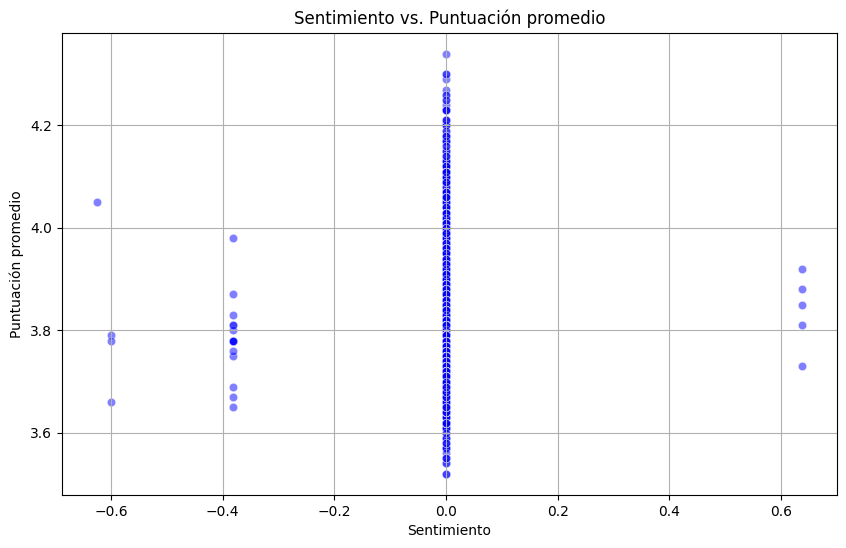

In [25]:
# Gráfico de dispersión: Sentimiento vs. Puntuación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentimiento', y='Average Rating', data=df, color='blue', alpha=0.5)
plt.title('Sentimiento vs. Puntuación promedio')
plt.xlabel('Sentimiento')
plt.ylabel('Puntuación promedio')
plt.grid(True)
plt.show()



### 6.2: Histograma de Sentimientos

Podemos crear un histograma para ver la distribución de los sentimientos de 
las reseñas. 

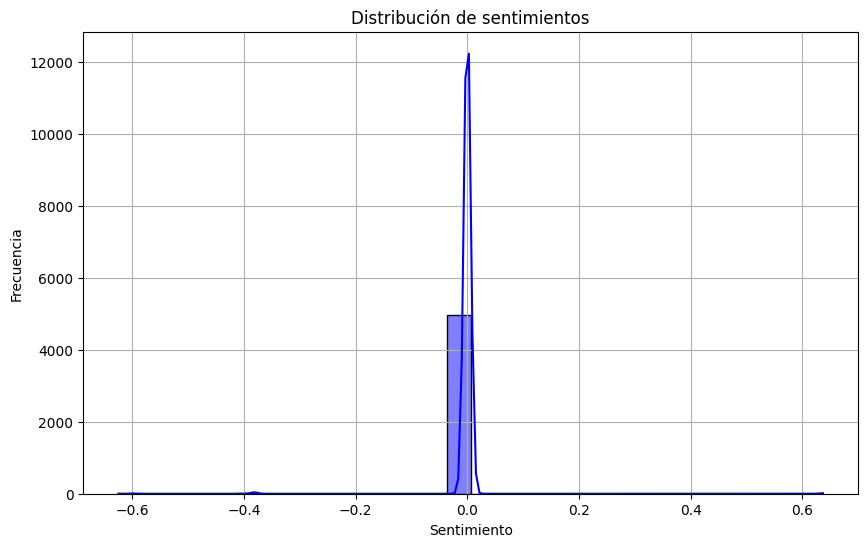

In [20]:
# Crear un histograma de la distribución de sentimientos 
plt.figure(figsize=(10, 6))
sns.histplot(df['sentimiento'], bins=30, color='blue', kde=True)
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Paso 7: Clasificación de Sentimientos

Clasificamos las reseñas en positivas, negativas y neutrales según el puntaje 
de sentimiento. Utilizamos un umbral para determinar estas categorías. 

In [21]:
# Clasificar las reseñas según el sentimiento 
df['clasificacion_sentimiento'] = df['sentimiento'].apply(lambda x: 'Positivo' if x 
> 0 else ('Negativo' if x < 0 else 'Neutral')) 
# Ver las frecuencias de cada clase 
df['clasificacion_sentimiento'].value_counts() 

clasificacion_sentimiento
Neutral     4976
Negativo      19
Positivo       5
Name: count, dtype: int64

### 7.1: Visualización de la clasificación de sentimientos 

Creamos un gráfico para ver la cantidad de reseñas positivas, negativas y 
neutrales.

C:\Users\Javier\AppData\Local\Temp\ipykernel_15236\679631059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='clasificacion_sentimiento', palette='viridis', )


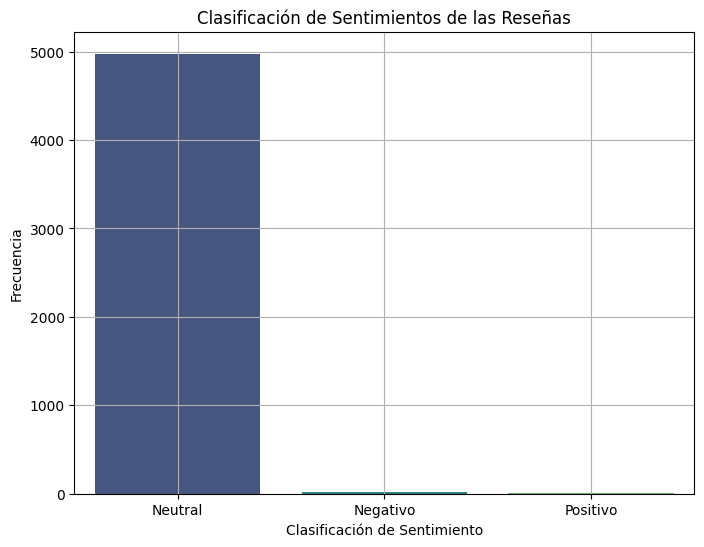

In [22]:
# Visualizar las clasificaciones de sentimiento 
plt.figure(figsize=(8, 6)) 
sns.countplot(data=df, x='clasificacion_sentimiento', palette='viridis', )
plt.title('Clasificación de Sentimientos de las Reseñas') 
plt.xlabel('Clasificación de Sentimiento') 
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### Paso 8: Conclusiones

- Distribución de sentimientos: El histograma nos muestra si las reseñas 
son mayormente positivas, negativas o neutrales. Si la mayoría de las 
reseñas son positivas, podríamos investigar qué características del 
álbum generan ese sentimiento. 
- Relación entre sentimiento y puntuación: El gráfico de dispersión nos 
ayuda a ver si hay alguna correlación entre la puntuación promedio y el 
sentimiento de las reseñas. Por ejemplo, los álbumes con puntuaciones 
altas pueden tener sentimientos más positivos. 
- Clasificación de sentimiento: Al clasificar las reseñas como positivas, 
negativas o neutrales, podemos analizar las reseñas para cada categoría 
y detectar tendencias o patrones en los comentarios.

### Resumen 

En este ejercicio, hemos realizado un análisis de sentimientos sobre las 
reseñas de álbumes utilizando el paquete nltk para procesamiento de texto 
(tokenización, eliminación de stopwords y lematización) y el 
SentimentIntensityAnalyzer para calcular los puntajes de sentimiento. 
Finalmente, visualizamos los resultados para comprender mejor el sentimiento 
detrás de las reseñas y su relación con la puntuación promedio de cada álbum.